In [1]:
%matplotlib inline
import dabest
import itertools
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from scipy.stats import ttest_ind

In [2]:
float_types = ['ser', 'his', 'val', 'thr', 'pro', 'arg', 'glu']
short_names = float_types
long_names = ['Serine', 'Histidine', 'Valine', 'Threonine', 'Proline', 'Arginine', 'Glutamate']
dtypes = dict((aa, pd.np.float64) for aa in float_types)
fname = 'data/fig4/022720_repeat_f13c_extracted_transpose.csv'

# Data is the fraction of C atoms that are 13C
frac13c_df = pd.read_csv(fname, index_col=0, na_values='NAN', dtype=dtypes)

In [23]:
# fraction of 12C in the intracellular pool inferred from comparing arg and glu
frac_13c_glu = 6 * frac13c_df.arg - 5 * frac13c_df.glu
frac_12c_glu = 1-frac_13c_glu

df_data = {'f13c': frac_13c_glu, 'f12c': frac_12c_glu, 'sample_name': frac13c_df.sample_name}
isotope_df = pd.DataFrame(df_data)

mean_isotope_df = isotope_df.groupby('sample_name').mean()
mean_control_f12c = mean_isotope_df.loc['CAfree_bioreactor'].f12c
mean_control_f12c

0.25037572100000016

In [40]:
# Convert data to frac 12C as opposed to fraction 13C that's reported in the file
frac12c_df = frac13c_df.copy()
frac12c_df[float_types] = 1.0 - frac13c_df[float_types]
pct12c_df = frac12c_df.copy()
pct12c_df[float_types] *= 100

# Display %12C for serine and valine, which are both metabolic products of 3-phosphoglycerate
cols = ['ser', 'val', 'sample_name']
pct12c_df[cols]

mean_labeling_df = frac12c_df.groupby('sample_name').mean()
mean_control_f12c_ser = mean_labeling_df.loc['CAfree_bioreactor'].ser
baseline_12c_cycling_ser = mean_control_f12c / mean_control_f12c_ser
print(baseline_12c_cycling_ser)

expected_baseline_ser = isotope_df.f12c / baseline_12c_cycling_ser
measured_ser = frac12c_df.ser
corrected_measured_ser = measured_ser / isotope_df.f12c

100*(corrected_measured_ser - expected_baseline_ser)

40.29385355747034


sample
AF 1                   1.478521
AF 2                   3.141637
AF 3                   0.948236
AF 4                   1.779882
water_blank          126.730196
AF 5                   5.039440
AF 6                   0.894692
AF 7                   5.745307
AF 8                   1.961940
AF 9                   1.064592
AF 10                  1.433538
water_blank           15.563849
AF 11                  2.723227
AF 12                  2.763231
AF 13                  2.513579
AF 14                  1.758520
100pc 13C biomass           NaN
75pc 13C biomass            NaN
99% 13C std            5.557298
75% 13C std          128.095779
water_blank           42.395297
50% 13C std           96.800185
25% 13C std          100.886556
dtype: float64

In [4]:
# Make a color palette for the swarmplot that colors replicates differently.
greys = sns.color_palette('Greys', n_colors=8)
purples = sns.color_palette('Purples', n_colors=8)
plt.rc('axes', linewidth=2)
plt.rc('xtick.major', size=8)
plt.rc('xtick.major', width=1.25)
plt.rc('ytick.major', size=8)
plt.rc('ytick.major', width=1.25)

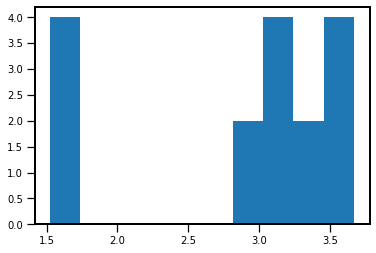

In [10]:
# Bootstrap enrichment ratio
controls = pct12c_df.short_name == 'Control'
exps = pct12c_df.short_name == 'E1'
control_data = pct12c_df[controls].ser
exp_data = pct12c_df[exps].ser

ratios = []
diffs = []
for exp_subset in itertools.combinations(exp_data.to_list(), 3):
    mean_exp = np.mean(exp_subset)
    for control_subset in itertools.combinations(control_data, 3):
        mean_control = np.mean(control_subset)
        ratios.append(mean_exp/mean_control)
        diffs.append(mean_exp-mean_control)
    
plt.hist(np.array(diffs))
plt.show()

/usr/local/lib/python3.6/site-packages/seaborn/utils.py:238: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  maj_on = any(t.tick1On for t in ax_i.yaxis.majorTicks)
/usr/local/lib/python3.6/site-packages/seaborn/utils.py:239: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  min_on = any(t.tick1On for t in ax_i.yaxis.minorTicks)
/usr/local/lib/python3.6/site-packages/seaborn/utils.py:242: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = maj_on
/usr/local/lib/python3.6/site-packages/seaborn/utils.py:242: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2

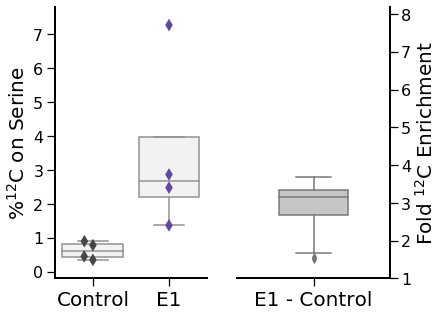

In [11]:
# Plot for serine
plt.figure(figsize=(6,5))

ax1 = plt.subplot(1,2,1)

pal = {'Control': greys[-2], 'E1':  purples[-2]}
sns.boxplot(data=pct12c_df, x='short_name', y='ser', order=['Control', 'E1'], color=greys[0])
sns.swarmplot(data=pct12c_df, x='short_name', y='ser', order=['Control', 'E1'], palette=pal, size=9, marker='d')

yl = '%$^{12}$C on Serine'
plt.ylabel(yl, fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=20)
plt.xlabel('')
sns.despine(ax=ax1)

ax2 = plt.subplot(1,2,2)
#ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

sns.boxplot(data=diffs, color=greys[2], width=0.45)

plt.ylim((1, 8.2))
sns.despine(ax=ax2, right=False, left=True)
plt.xticks([0], ['E1 - Control'], fontsize=20)
plt.xlabel('')
plt.yticks(fontsize=16)
plt.ylabel('Fold $^{12}$C Enrichment', fontsize=20)

plt.savefig('fig4/fig4_ser_est.png', dpi=300)
plt.show()


/usr/local/lib/python3.6/site-packages/seaborn/utils.py:238: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  maj_on = any(t.tick1On for t in ax_i.yaxis.majorTicks)
/usr/local/lib/python3.6/site-packages/seaborn/utils.py:239: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  min_on = any(t.tick1On for t in ax_i.yaxis.minorTicks)
/usr/local/lib/python3.6/site-packages/seaborn/utils.py:242: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = maj_on
/usr/local/lib/python3.6/site-packages/seaborn/utils.py:242: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2

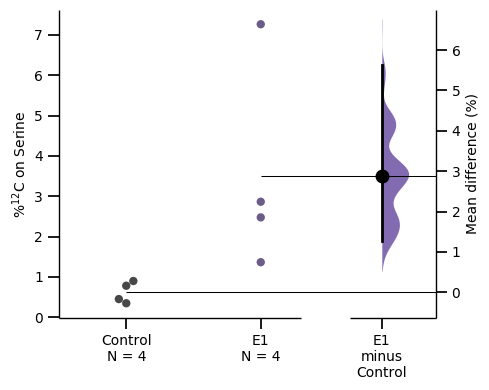

In [7]:
# Estimation plot for serine
ser_dabest = dabest.load(data=pct12c_df, x="short_name", y="ser",
                         idx=("Control", "E1"))
pal = {'Control': greys[-2], 'E1':  purples[-2]}
ser_dabest.mean_diff.plot(custom_palette=pal, swarm_label='%$^{12}$C on Serine', contrast_label='Mean difference (%)');
plt.tight_layout()
ser_dabest.mean_diff.plot?

/usr/local/lib/python3.6/site-packages/seaborn/utils.py:238: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  maj_on = any(t.tick1On for t in ax_i.yaxis.majorTicks)
/usr/local/lib/python3.6/site-packages/seaborn/utils.py:239: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  min_on = any(t.tick1On for t in ax_i.yaxis.minorTicks)
/usr/local/lib/python3.6/site-packages/seaborn/utils.py:242: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = maj_on
/usr/local/lib/python3.6/site-packages/seaborn/utils.py:242: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2

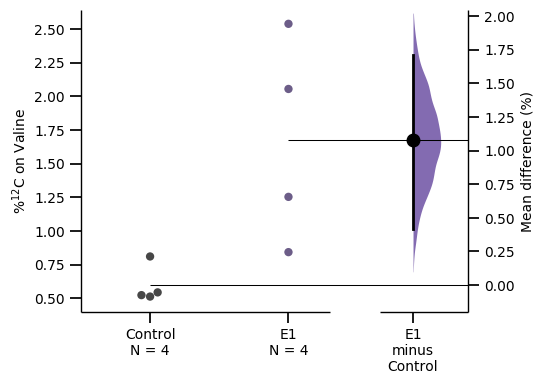

In [8]:
# Estimation plot for valine
val_dabest = dabest.load(data=pct12c_df, x="short_name", y="val",
                         idx=("Control", "E1"))
pal = {'Control': greys[-2], 'E1':  purples[-2]}
val_dabest.mean_diff.plot(custom_palette=pal, swarm_label='%$^{12}$C on Valine', contrast_label='Mean difference (%)');